In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('churn.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.describe(include='O')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


### EDA

In [8]:
list_cat=[]
list_num=[]
for i in df:
    if df[i].dtype=='object':
        list_cat.append(i)
    else:
        list_num.append(i)

#### univariate

In [9]:
list_cat=df[list_cat]
type(list_cat)

pandas.core.frame.DataFrame

In [10]:
list_num=df[list_num]
type(list_num)

pandas.core.frame.DataFrame

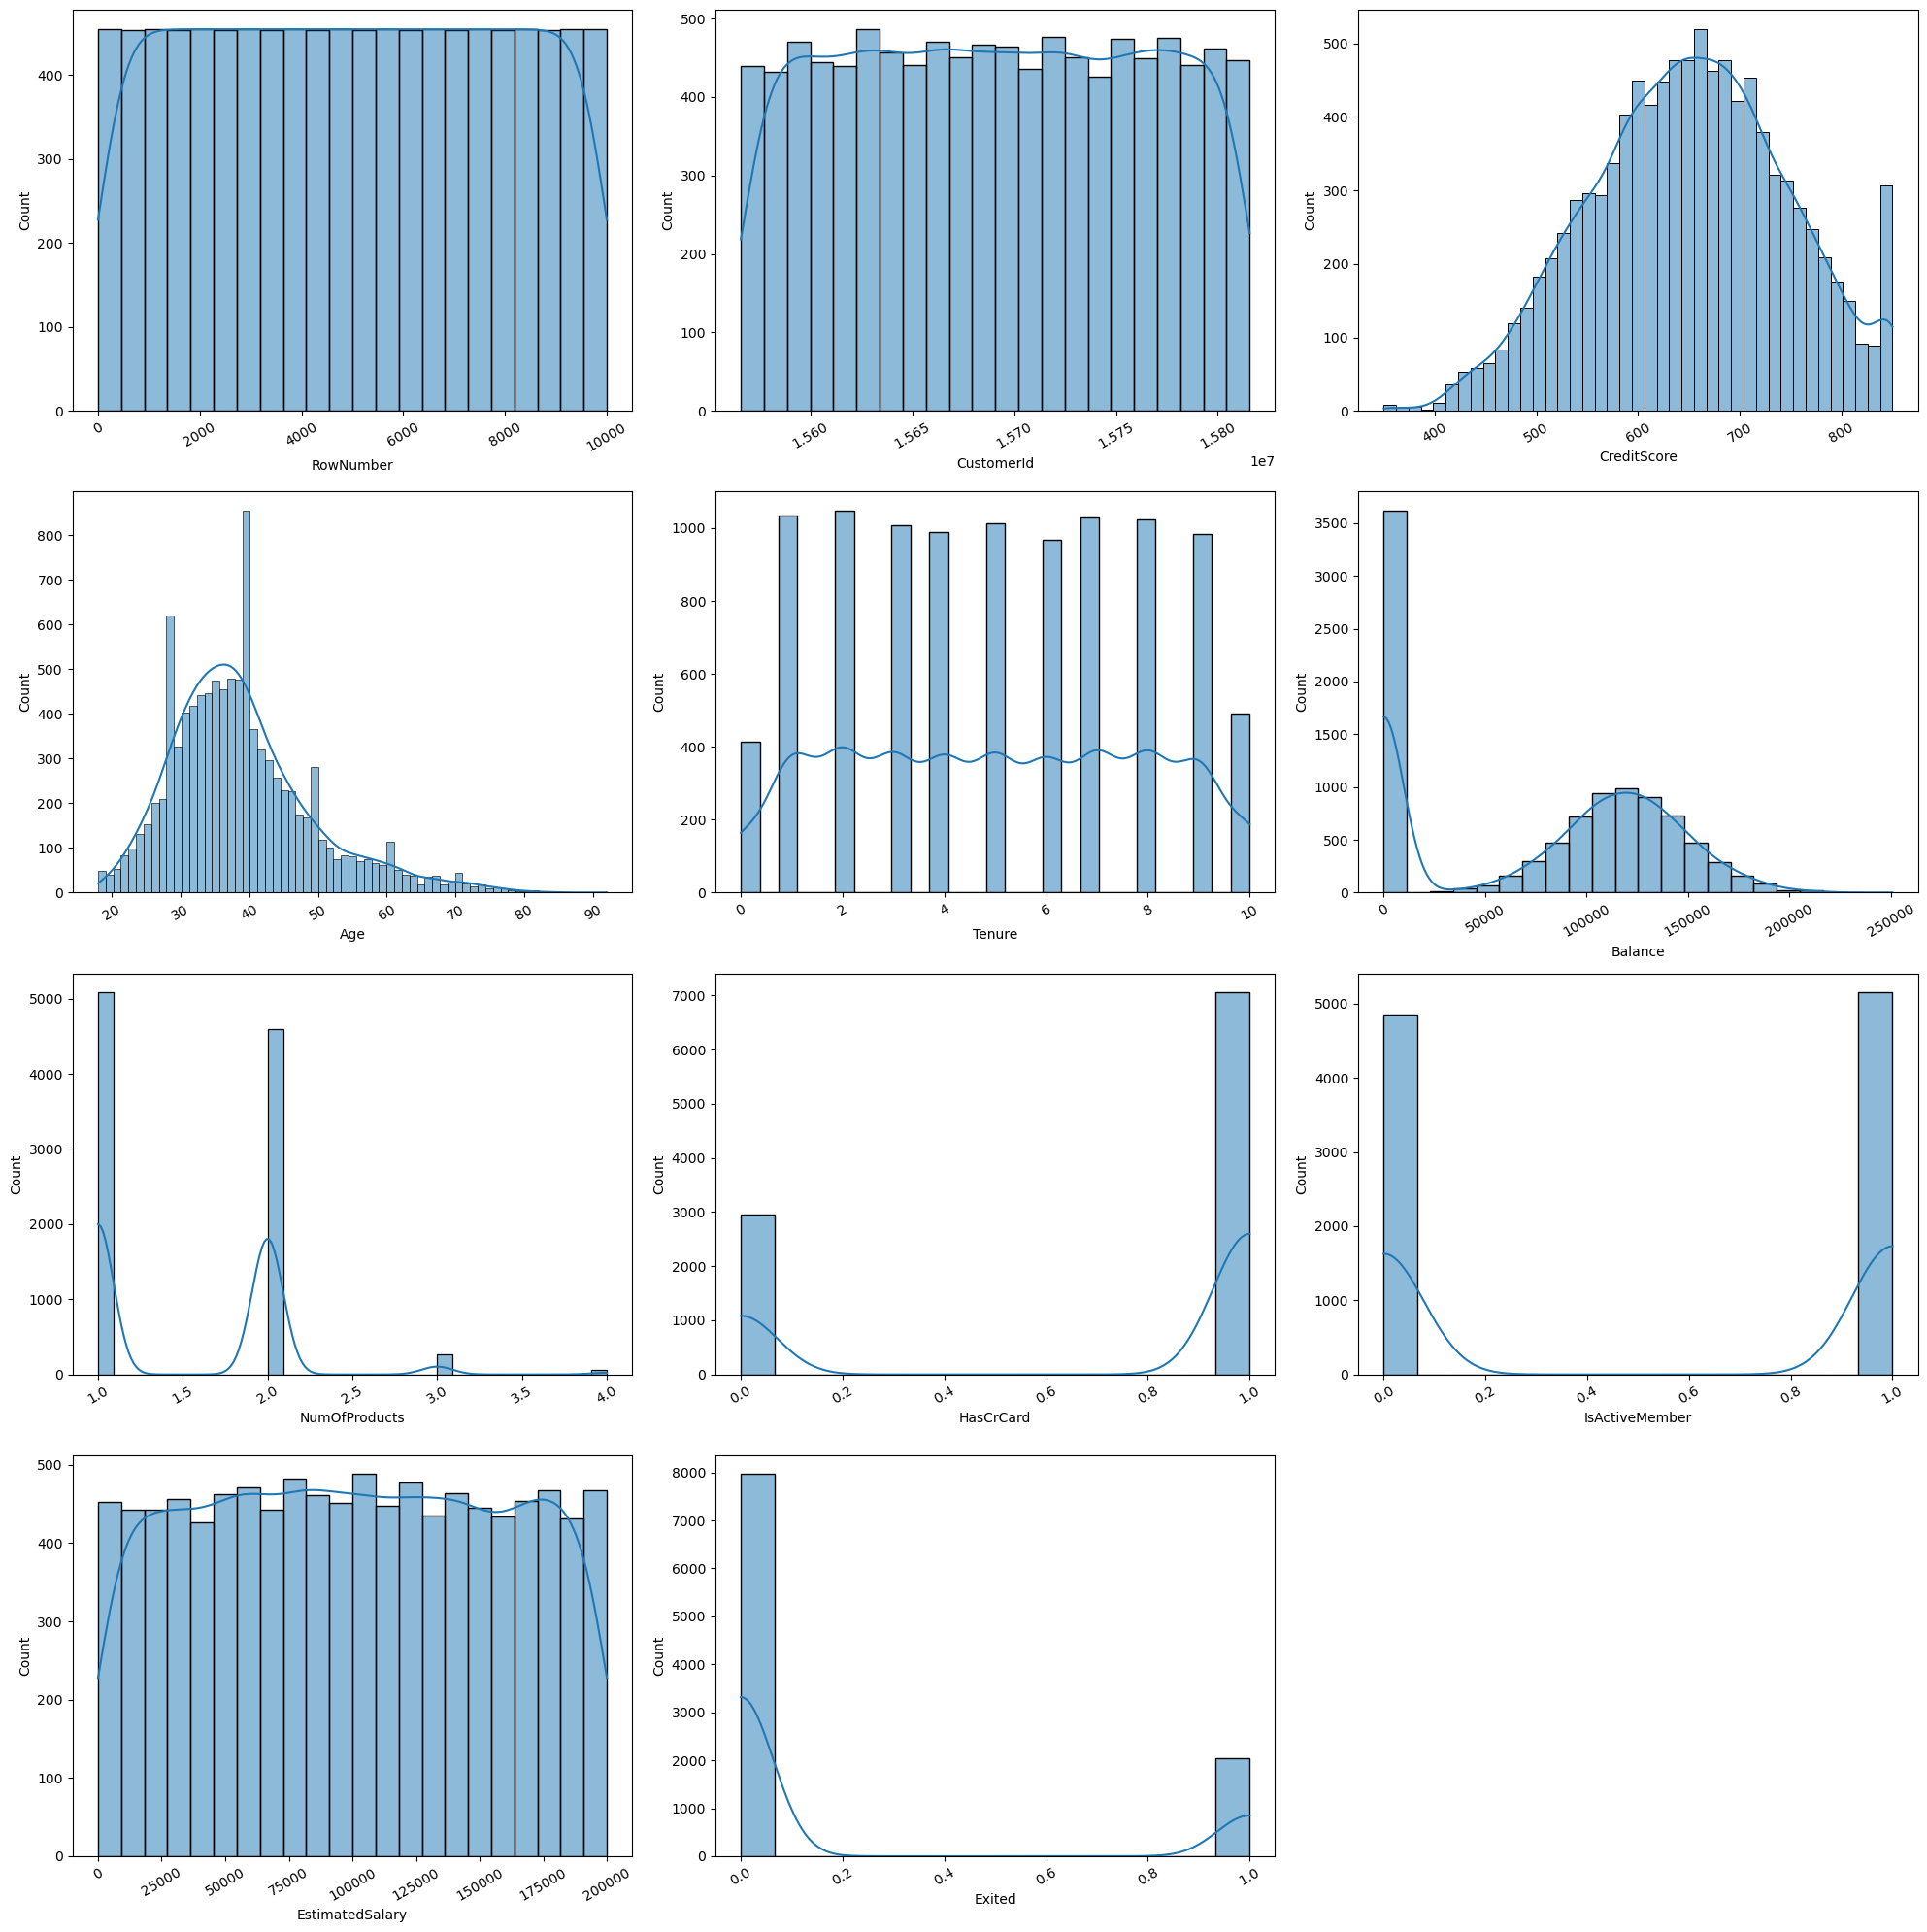

In [11]:
plt.figure(figsize=(20,20))
plotnumber=1
for i in list_num:
    plt.subplot(4,3,plotnumber)
    sns.histplot(x=df[i],kde=True)
    plt.xticks(rotation=30)
    plotnumber=plotnumber+1
plt.tight_layout()
plt.show()

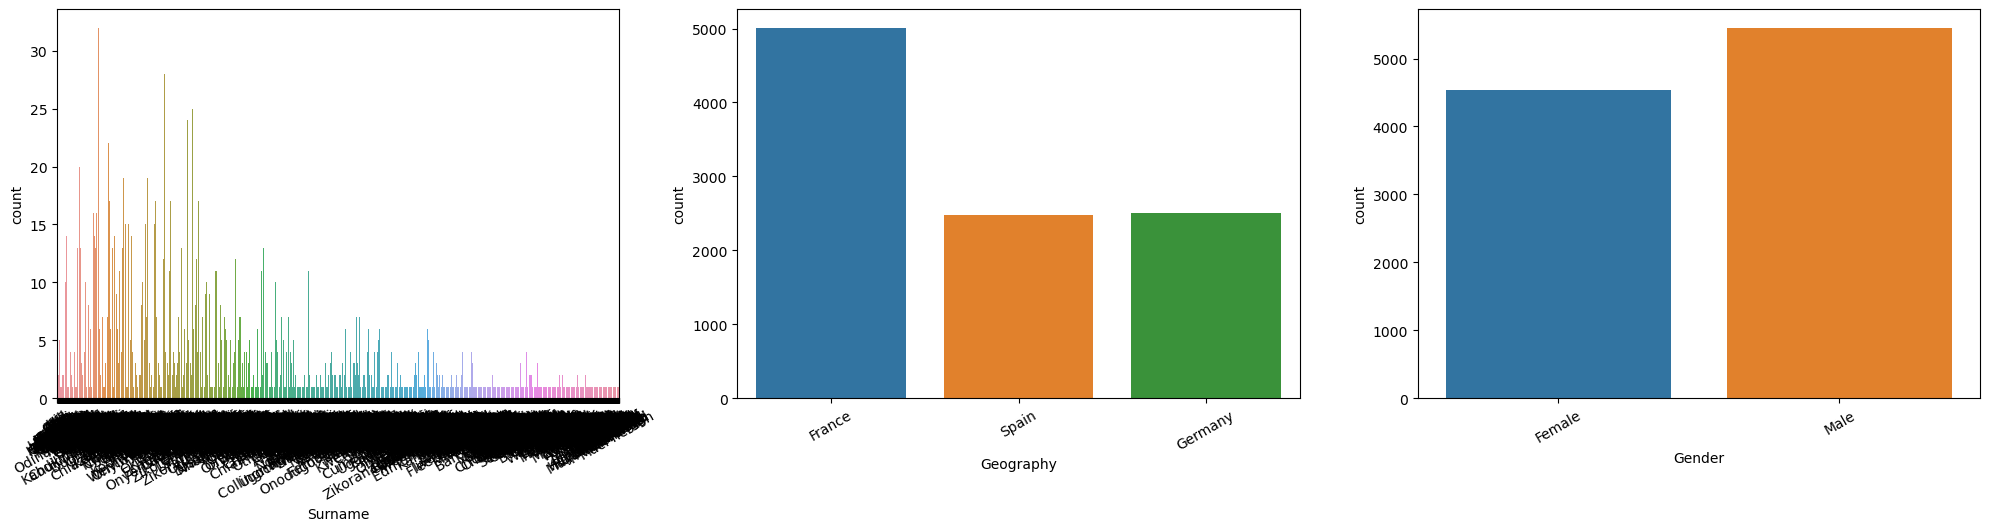

In [12]:
plt.figure(figsize=(20,20))
plotnumber=1
for i in list_cat:
    plt.subplot(4,3,plotnumber)
    sns.countplot(x=df[i])
    plt.xticks(rotation=30)
    plotnumber=plotnumber+1
plt.tight_layout()
plt.show()

#### Bivariate:

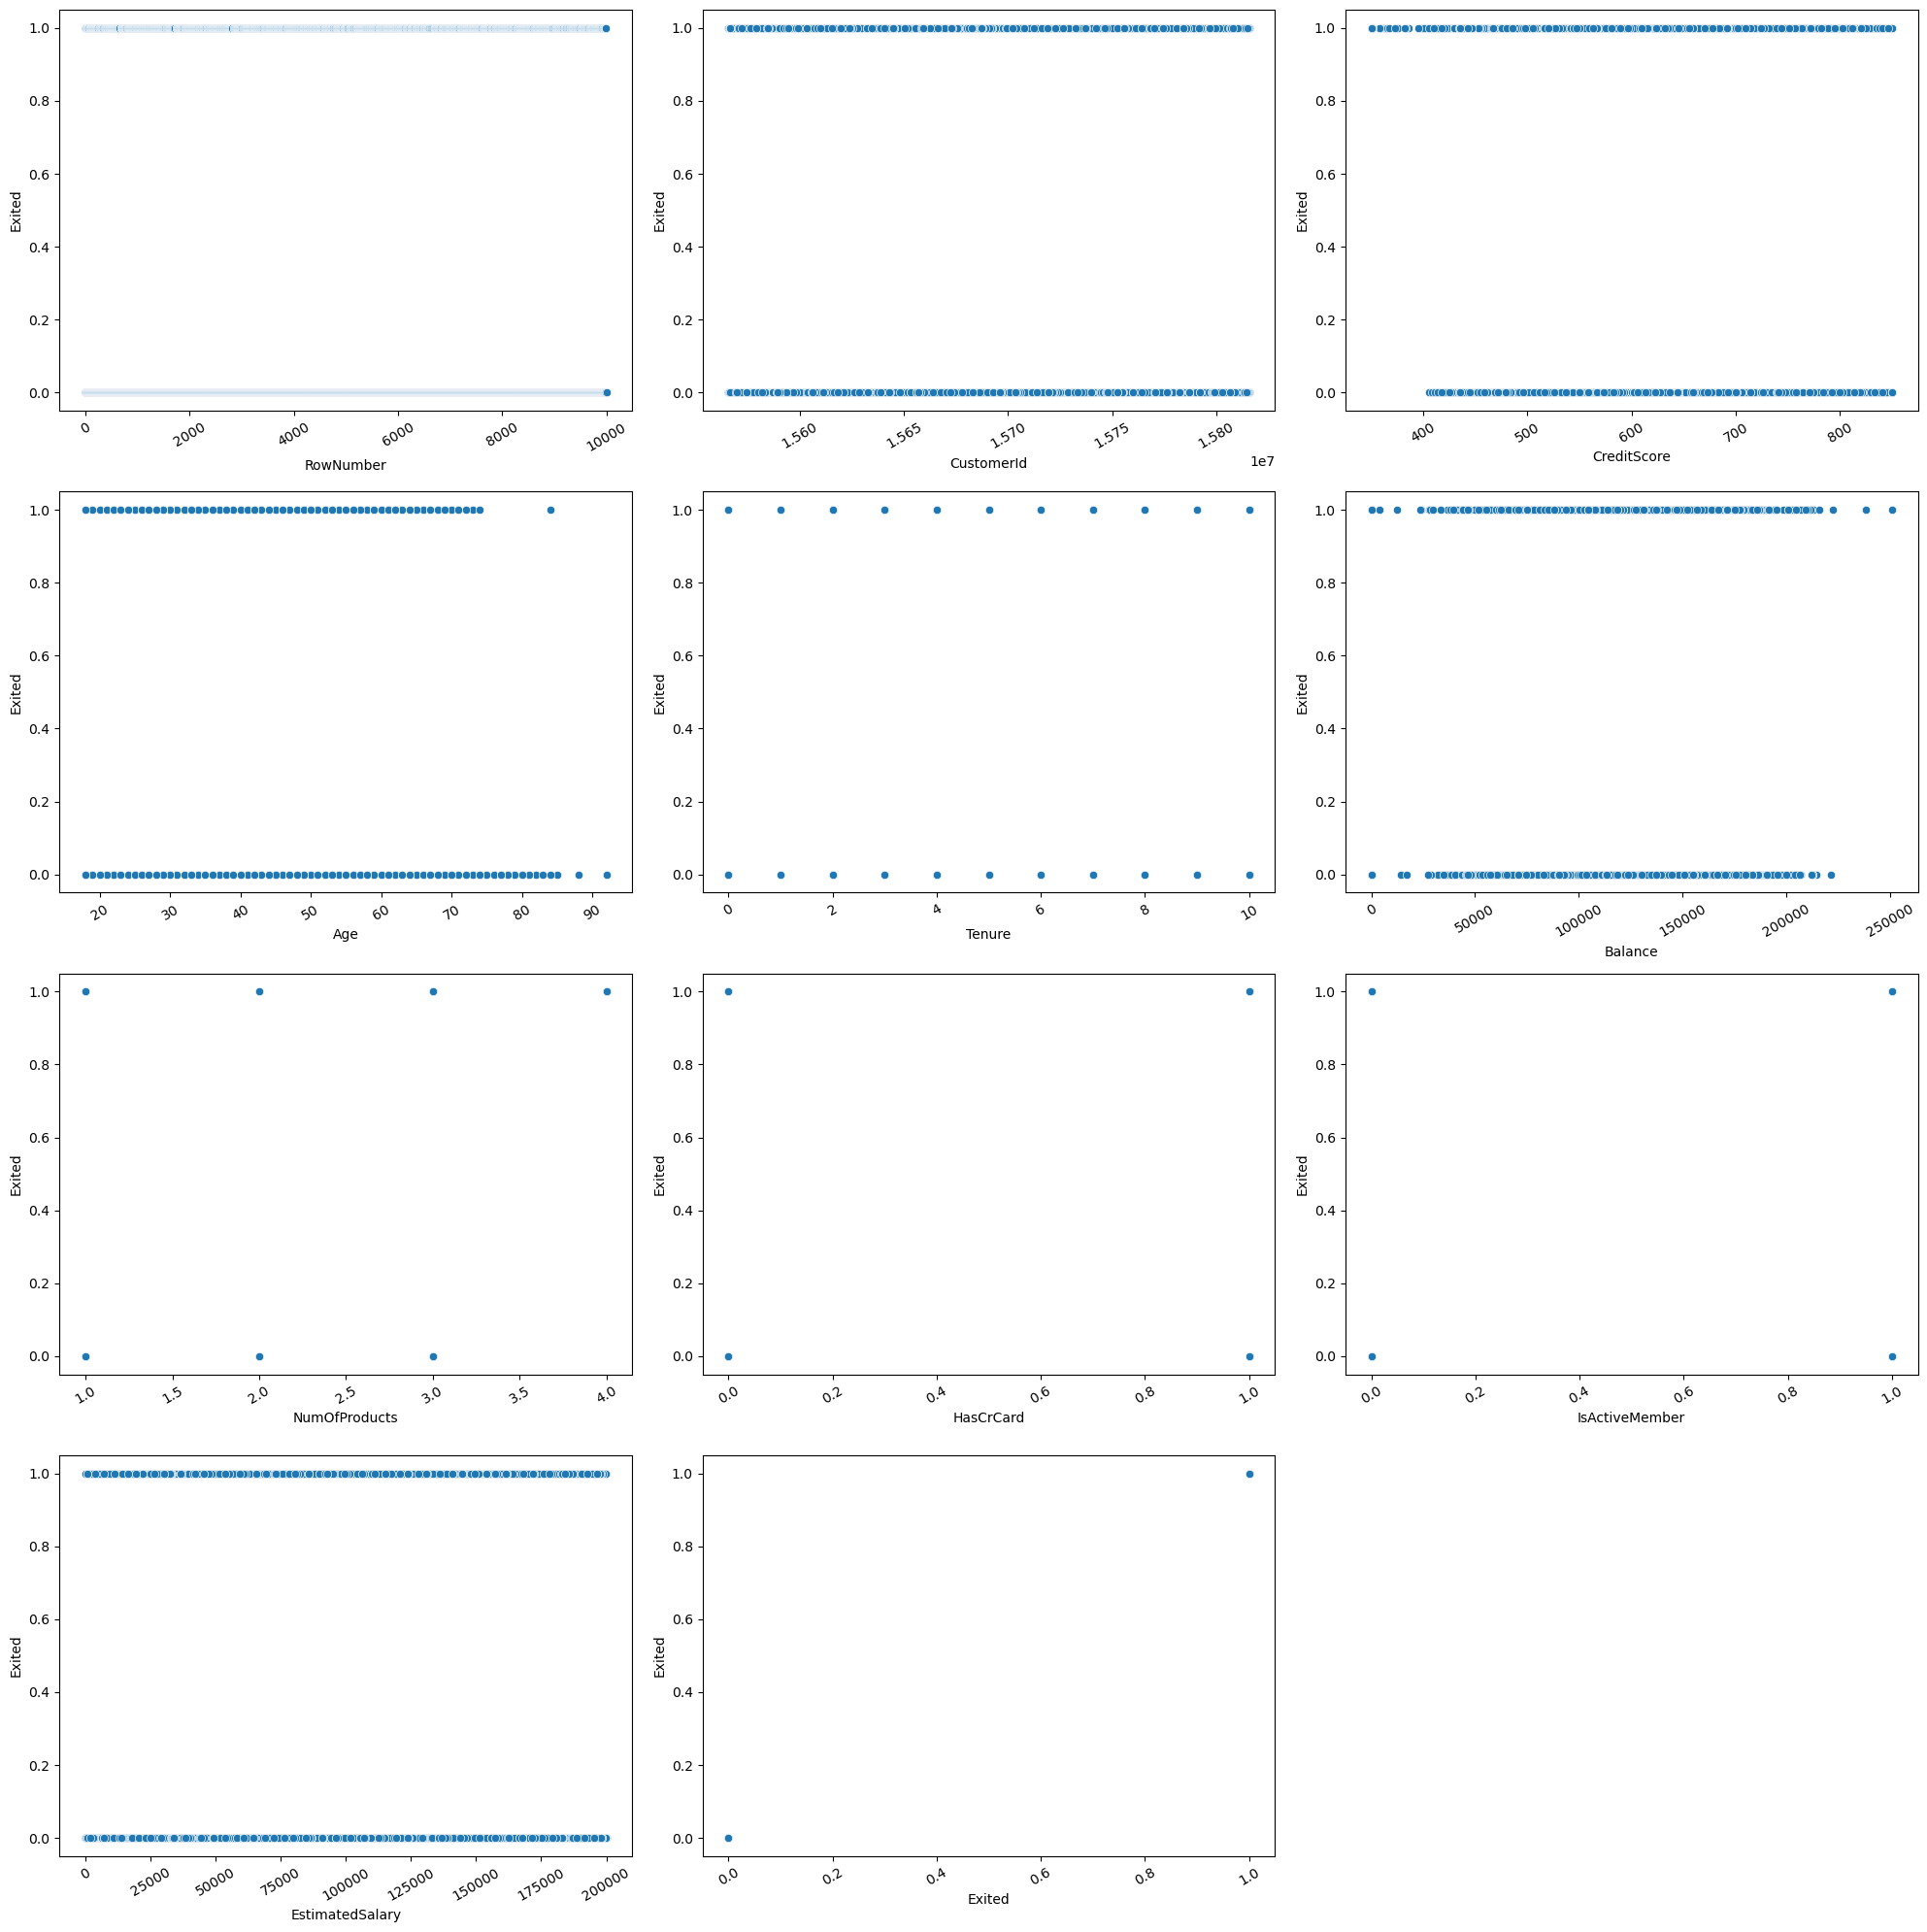

In [13]:
plt.figure(figsize=(20,20))
plotnumber=1
for i in list_num:
    plt.subplot(4,3,plotnumber)
    sns.scatterplot(x=df[i],y=df.Exited)
    plt.xticks(rotation=30)
    plotnumber=plotnumber+1
plt.tight_layout()
plt.show()

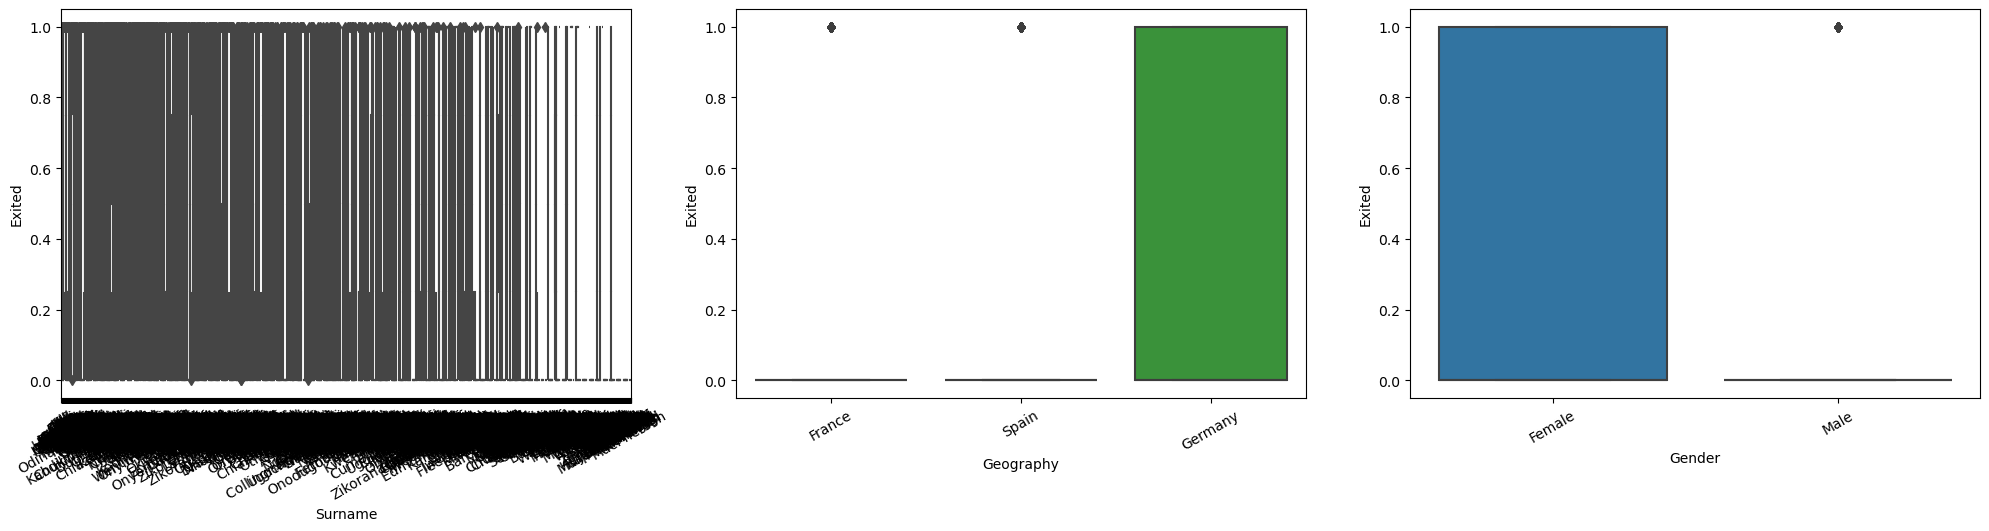

In [14]:
plt.figure(figsize=(20,20))
plotnumber=1
for i in list_cat:
    plt.subplot(4,3,plotnumber)
    sns.boxplot(x=df[i],y=df.Exited)
    plt.xticks(rotation=30)
    plotnumber=plotnumber+1
plt.tight_layout()
plt.show()

**Handling** **with** **NUll** **values** **and** **Crrouoted** **Data**

In [15]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [16]:
list_num.drop('Exited',axis=1,inplace=True)

after checking null values and crroupted data by using isnull() and std we found that their is no corrupted data and null values

**Handlind** **with** **Outliers**

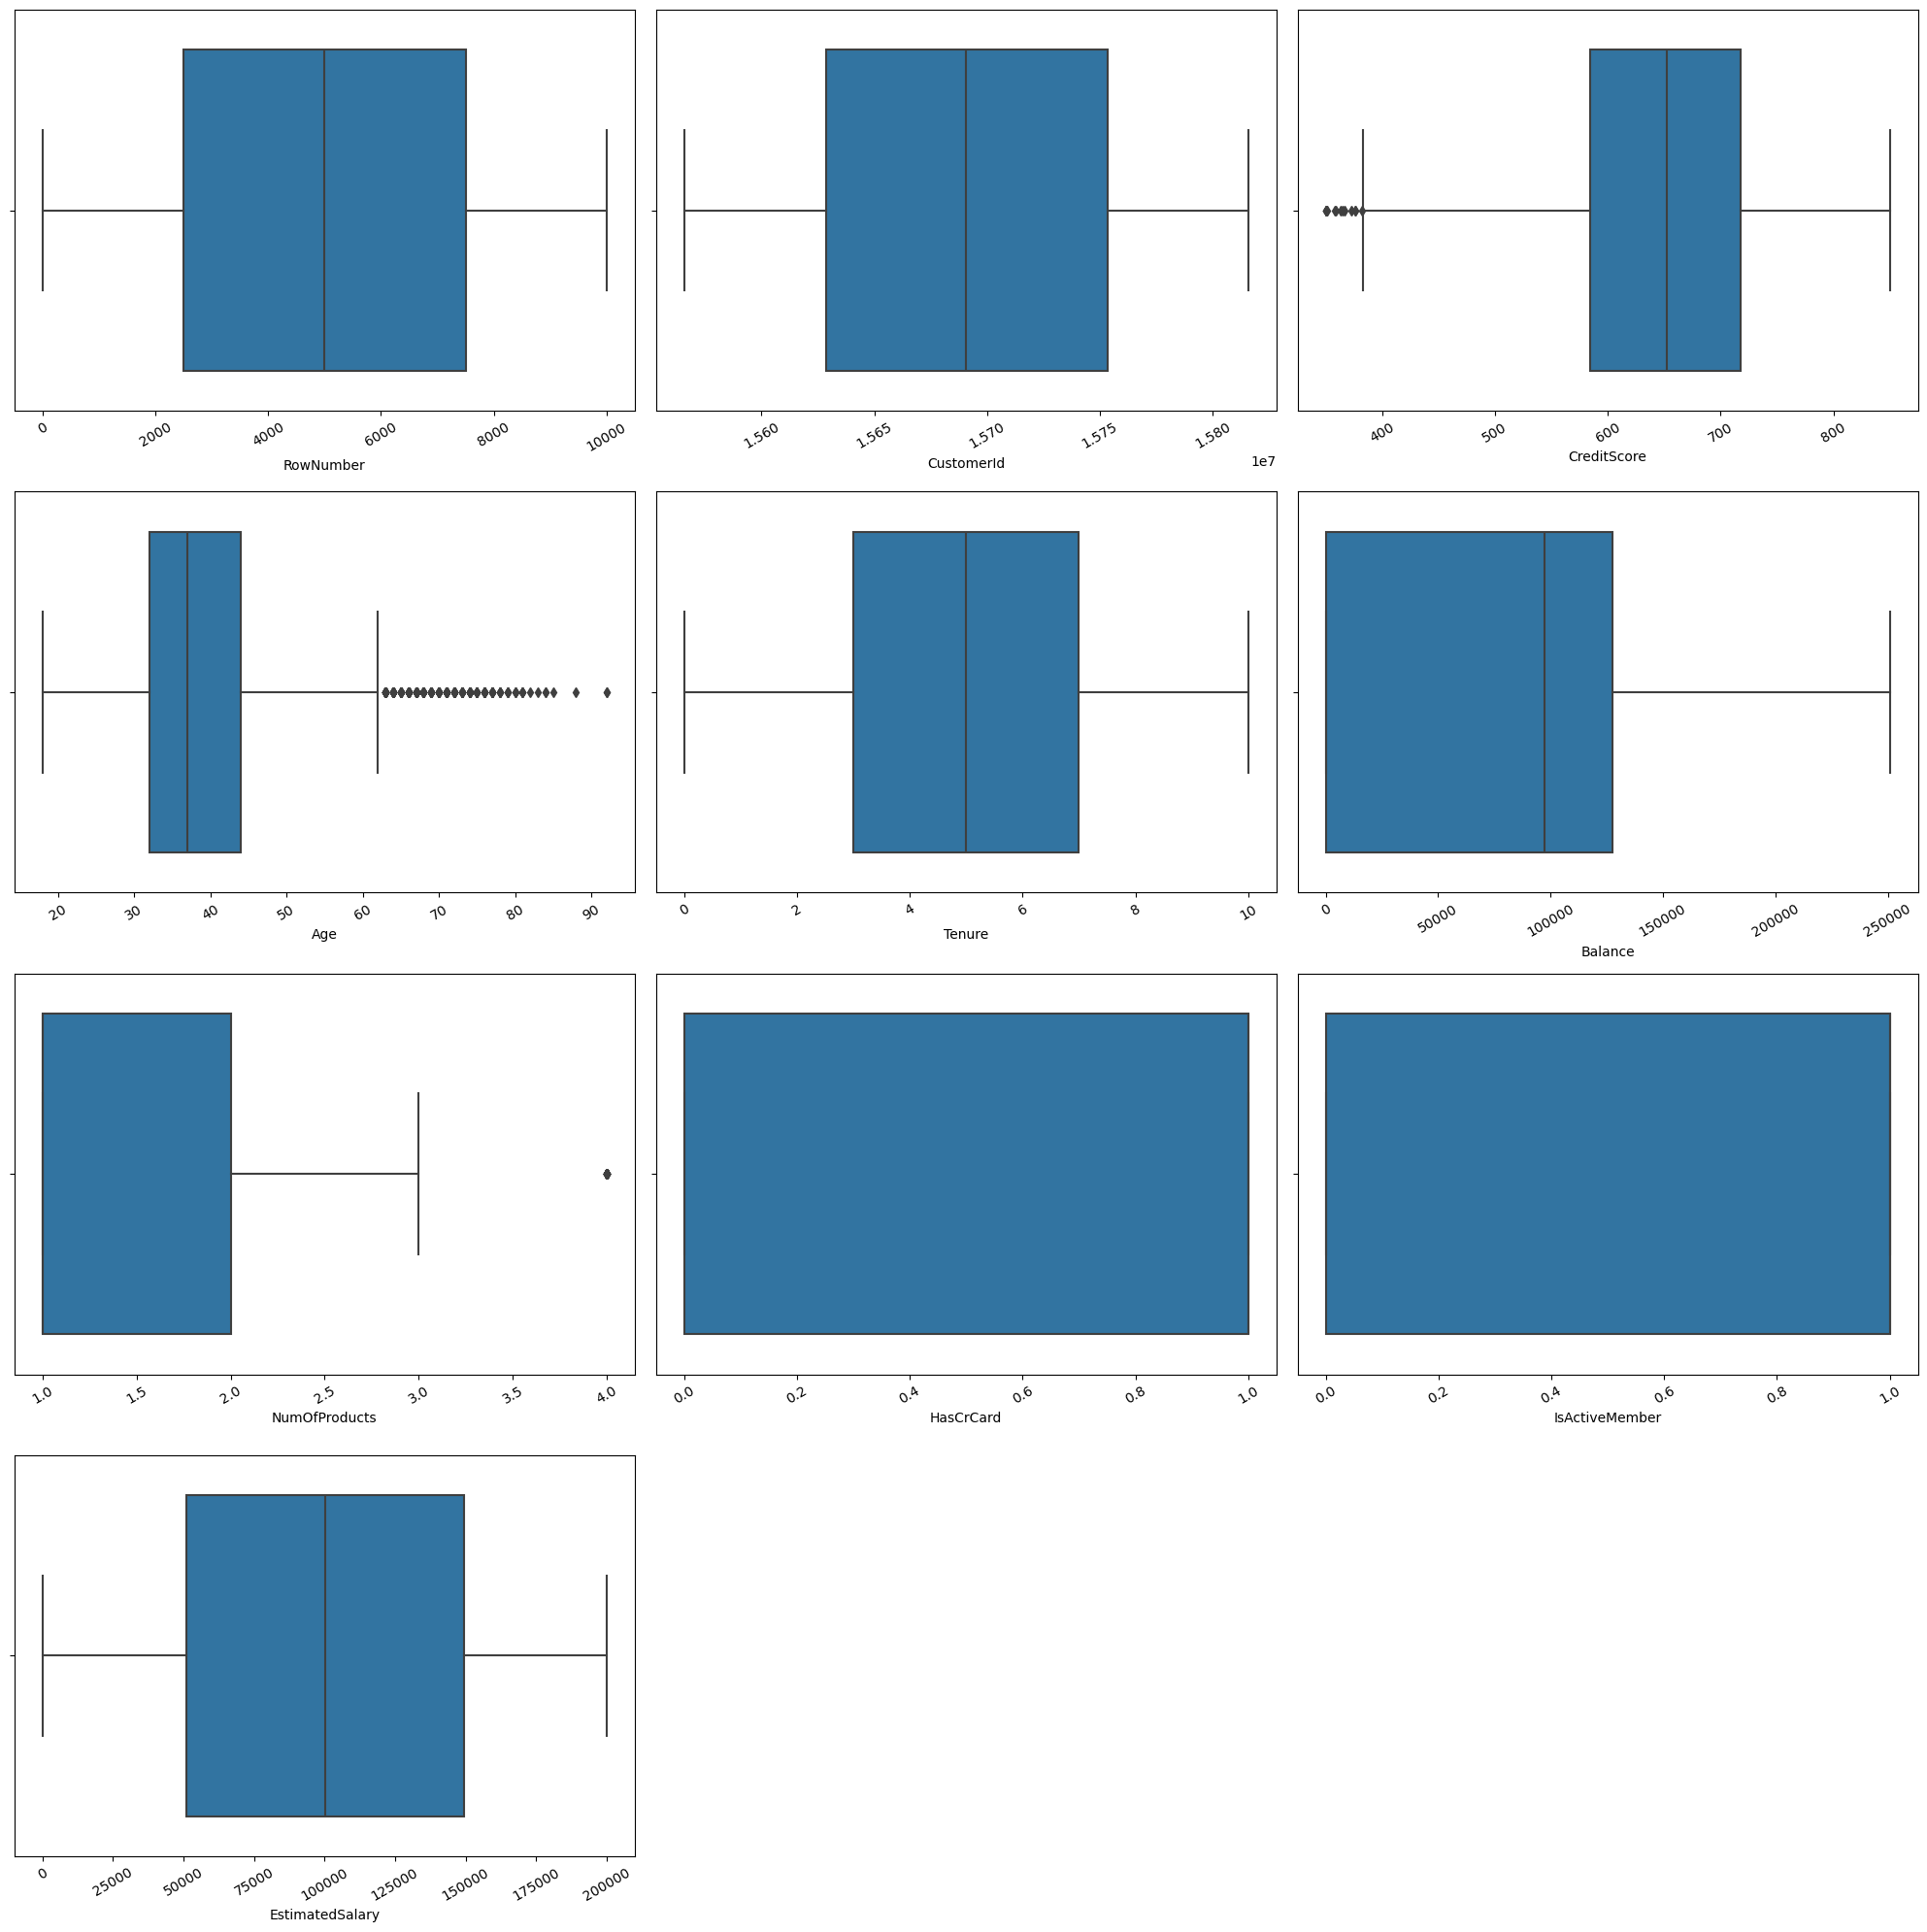

In [17]:
plt.figure(figsize=(20,20))
plotnumber=1
for i in list_num:
    plt.subplot(4,3,plotnumber)
    sns.boxplot(x=df[i])
    plt.xticks(rotation=30)
    plotnumber=plotnumber+1
plt.tight_layout()

In [18]:
a=1
for i in list_num:
    if(i in df):
        for j in df:
            if(j==i):

                q3=list_num[j].quantile(0.75)
                q1=list_num[j].quantile(0.25)
                IQR=q3-q1
                max_limit=q3+1.5*IQR
                min_limit=q1-IQR*1.5
                print(list_num[i].median())
                df.loc[df[j]>max_limit,j]=list_num[i].median()

                df.loc[df[j]<min_limit,j]=list_num[i].median()
                print(j,max_limit)

5000.5
RowNumber 14999.5
15690738.0
CustomerId 15940292.0
652.0
CreditScore 919.0
37.0
Age 62.0
5.0
Tenure 13.0
97198.54000000001
Balance 319110.60000000003
1.0
NumOfProducts 3.5
1.0
HasCrCard 2.5
1.0
IsActiveMember 2.5
100193.915
EstimatedSalary 296967.45375


after the seeing boxplot  i found our data is nearly Noramally Distributed

**Conversion  of Categorical Data into Numrical**

In [19]:
list_cat

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female
...,...,...,...
9995,Obijiaku,France,Male
9996,Johnstone,France,Male
9997,Liu,France,Female
9998,Sabbatini,Germany,Male


after seeing categorical columns we conclued that surname column is reduent for us

In [20]:
df.drop('Surname',axis=1,inplace=True)
list_cat.drop('Surname',axis=1,inplace=True)


In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in list_cat:
    df[i]=le.fit_transform(df[i])

df.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1.0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2.0,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3.0,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4.0,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5.0,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0


**Scaling** of Data

```
# This is formatted as code
```



In [22]:

from  sklearn.preprocessing import StandardScaler
sc=StandardScaler()
for i in list_num:
    df[i]=sc.fit_transform(df[[i]])
df.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-1.731878,-0.783213,-0.332983,0,0,0.490105,-1.041760,-1.225848,-0.930425,0.646092,0.970243,0.021886,1
1,-1.731531,-0.606534,-0.447572,2,0,0.374424,-1.387538,0.117350,-0.930425,-1.547768,0.970243,0.216534,0
2,-1.731185,-0.995885,-1.551792,0,0,0.490105,1.032908,1.333053,2.702630,0.646092,-1.030670,0.240687,1
3,-1.730838,0.144767,0.500391,0,0,0.143063,-1.387538,-1.225848,0.886102,-1.547768,-1.030670,-0.108918,0
4,-1.730492,0.652659,2.073384,2,0,0.605786,-1.041760,0.785728,-0.930425,0.646092,0.970243,-0.365276,0


**Balncing** we do balncing after train test split only on training data

**Feature Selection**

**Drop Redudent Columns**

In [23]:
df.drop(['RowNumber','CustomerId'],axis=1,inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.332983,0,0,0.490105,-1.041760,-1.225848,-0.930425,0.646092,0.970243,0.021886,1
1,-0.447572,2,0,0.374424,-1.387538,0.117350,-0.930425,-1.547768,0.970243,0.216534,0
2,-1.551792,0,0,0.490105,1.032908,1.333053,2.702630,0.646092,-1.030670,0.240687,1
3,0.500391,0,0,0.143063,-1.387538,-1.225848,0.886102,-1.547768,-1.030670,-0.108918,0
4,2.073384,2,0,0.605786,-1.041760,0.785728,-0.930425,0.646092,0.970243,-0.365276,0


**Finding Corelation between Features**

<Axes: >

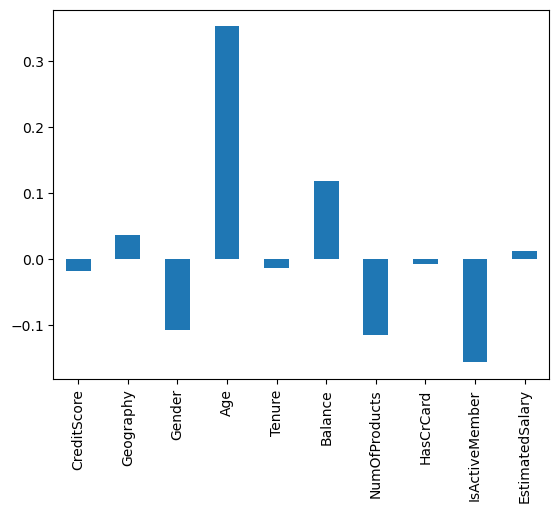

In [24]:
df.drop('Exited',axis=1).corrwith(df.Exited).plot(kind='bar')

<Axes: >

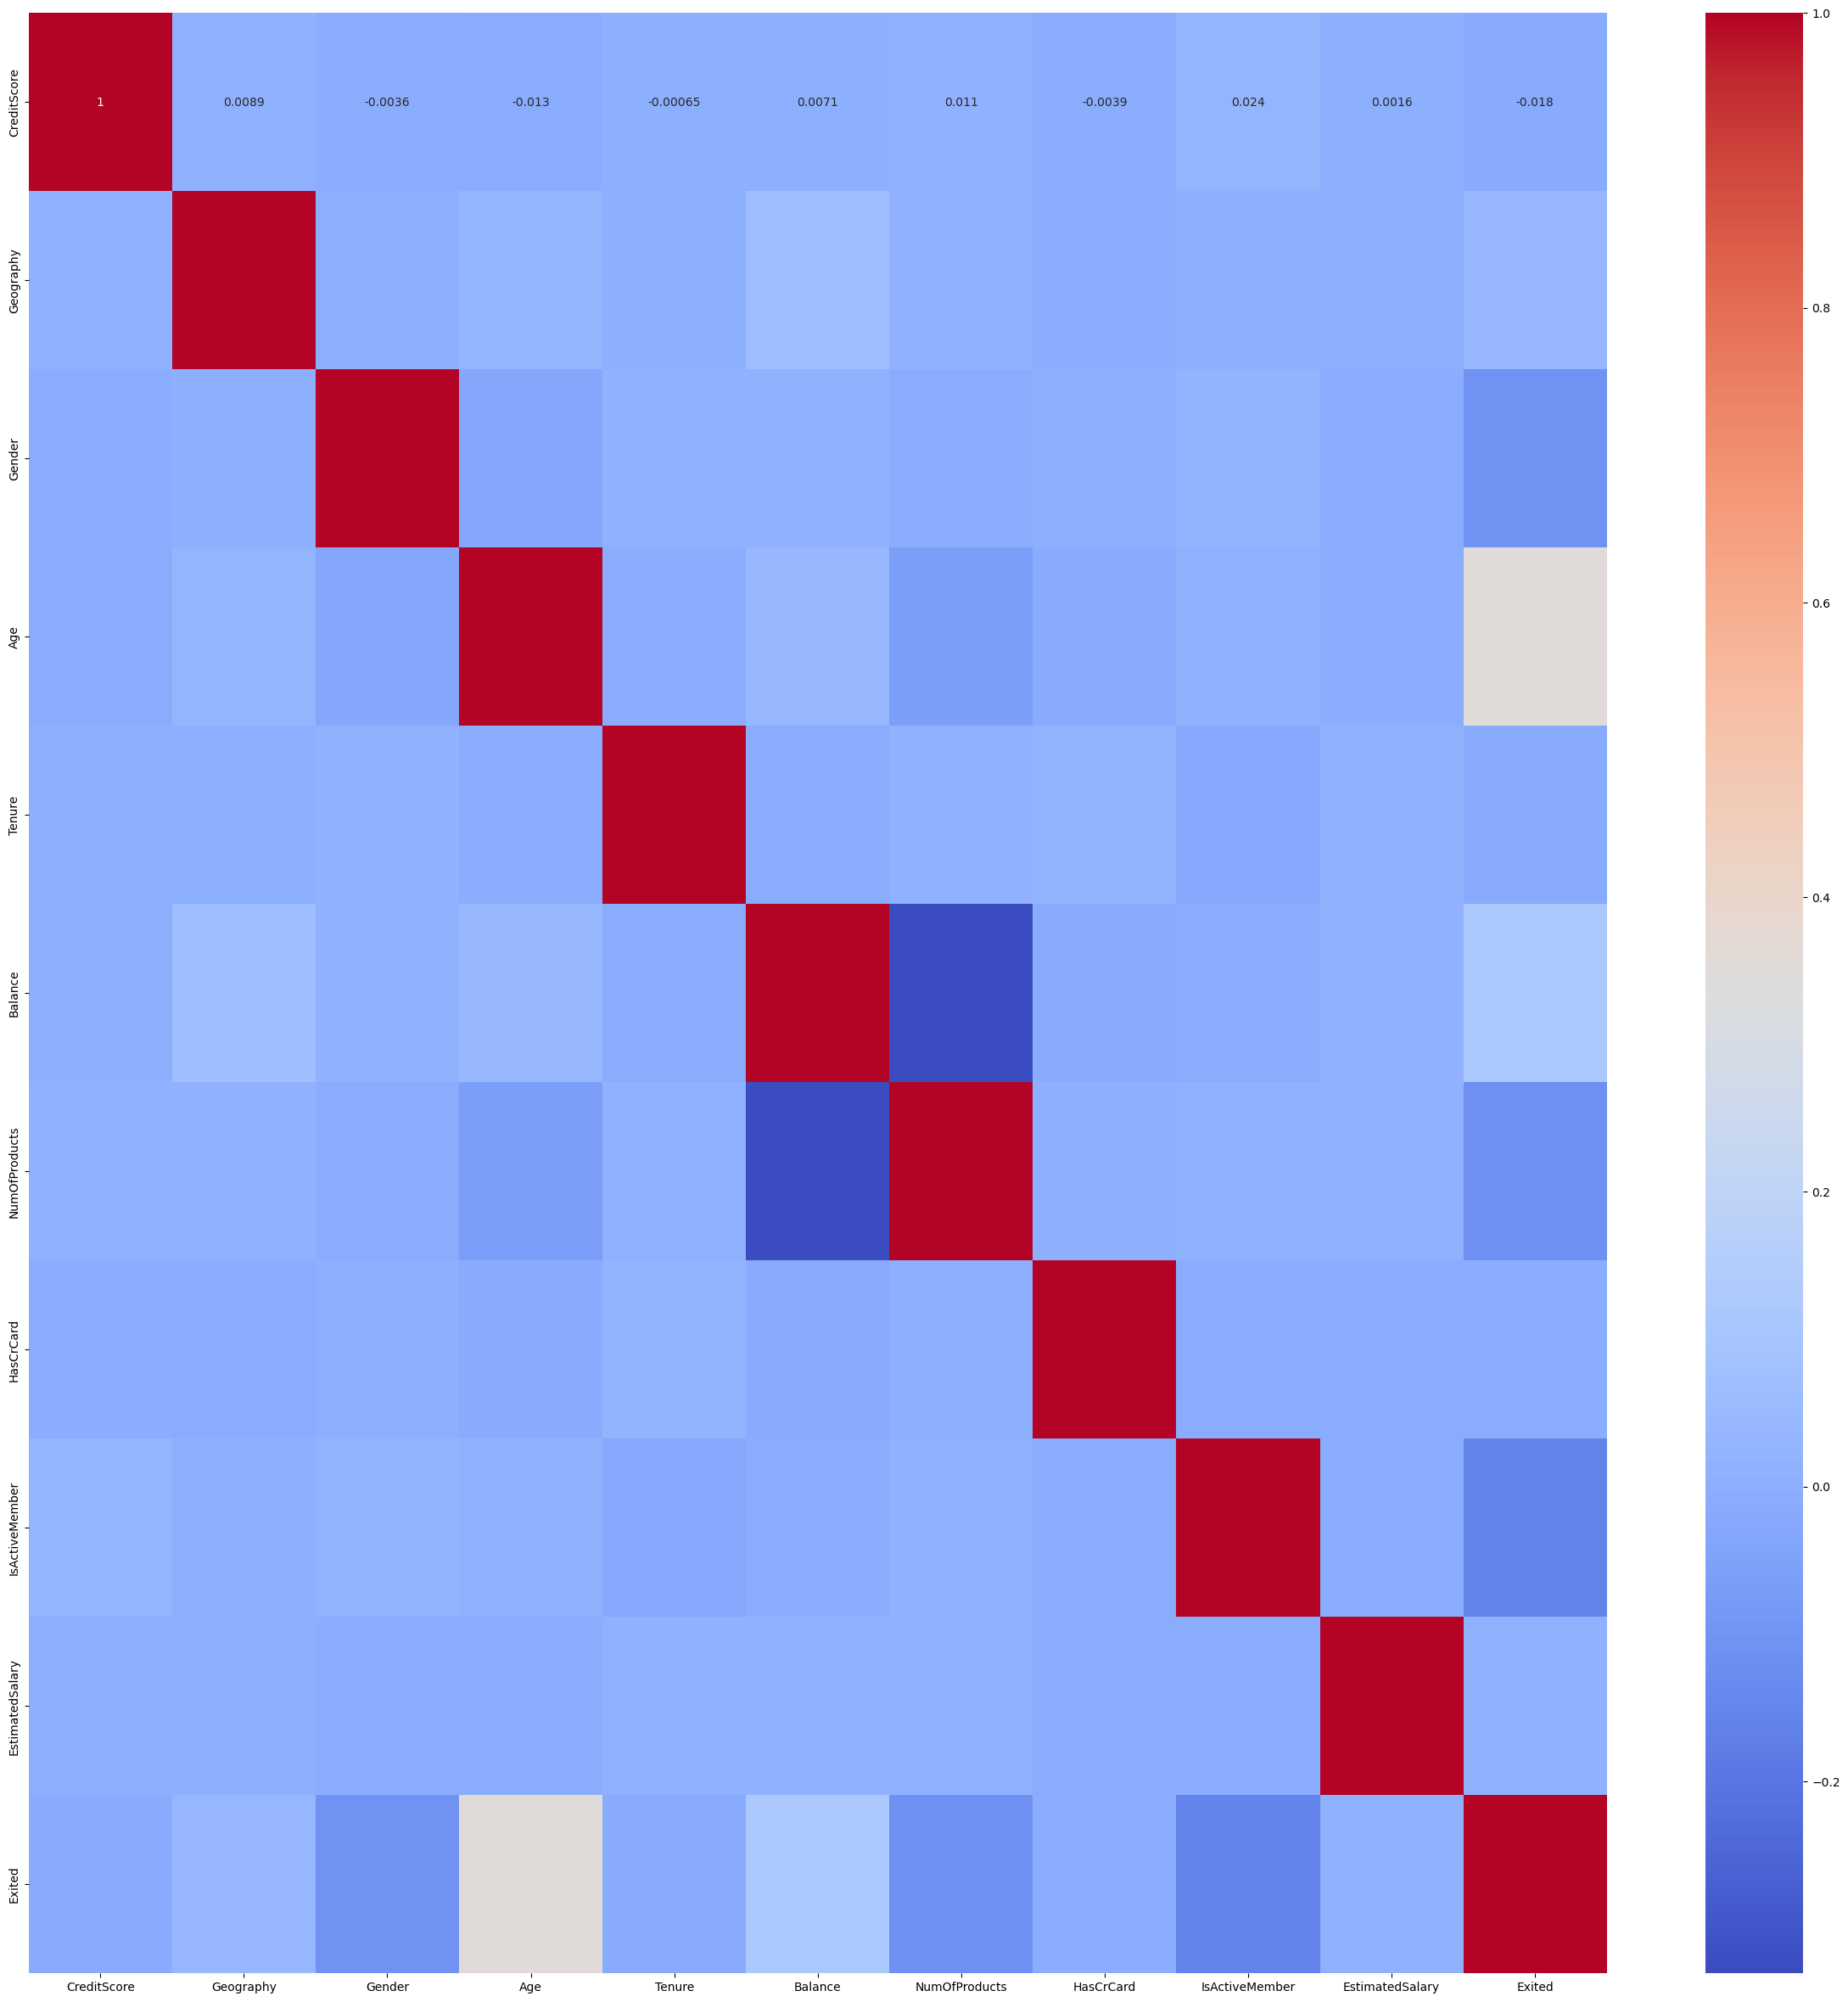

In [25]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

after analyzing heatmap i found their is no siginificatly co-realted

**Model Implemention**

In [26]:
from sklearn.model_selection import train_test_split

X=df.drop('Exited',axis=1)
y=df.Exited
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [27]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 6378, 1: 1622})
Counter({0: 1585, 1: 415})


In [28]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_train,y_train=sm.fit_resample(x_train,y_train)

In [29]:
from collections import Counter
print(Counter(y_train))

Counter({0: 6378, 1: 6378})


In [30]:
len(df.columns)

11

**Logistic Regression**

In [31]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [32]:
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [33]:
y_pred=lr.predict(x_test)

In [34]:
print(y_pred.shape)
print(y_test.shape)

(2000,)
(2000,)


In [35]:
y_test.values

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [37]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,recall_score,precision_score
print(confusion_matrix(y_test,y_pred))



[[1177  408]
 [ 128  287]]


In [38]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1585
           1       0.41      0.69      0.52       415

    accuracy                           0.73      2000
   macro avg       0.66      0.72      0.67      2000
weighted avg       0.80      0.73      0.75      2000



In [39]:
print(accuracy_score(y_test,y_pred))

0.732


In [40]:
print(f1_score(y_pred,y_test))

0.5171171171171172


In [41]:
print (recall_score(y_test,y_pred))

0.691566265060241


In [42]:
pd.crosstab(y_test,y_pred)

col_0,0,1
Exited,,
0,1177,408
1,128,287


**With Hyperparameter tunning**

In [43]:
from sklearn.model_selection import cross_val_score
cv=cross_val_score(lr,x_train,y_train,scoring='f1',cv=5)

In [44]:
from sklearn.model_selection import GridSearchCV
lr2=LogisticRegression()

param_grid={'C':[0.1,1,10,100,1000],'tol':[0.00001,0.0001,0.001,0.01,0.1],'max_iter':[100,200,300,400,500]}

In [45]:
grid=GridSearchCV(lr,param_grid,scoring='f1',cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'max_iter': [100, 200, 300, 400, 500],
                         'tol': [1e-05, 0.0001, 0.001, 0.01, 0.1]},
             scoring='f1')

In [46]:
grid.best_params_

{'C': 1, 'max_iter': 100, 'tol': 1e-05}

In [47]:
grid.best_estimator_

LogisticRegression(C=1, tol=1e-05)

In [48]:
lr3=LogisticRegression(C=0.1, tol=0.1)
lr3.fit(x_train,y_train)

LogisticRegression(C=0.1, tol=0.1)

In [49]:
y_pred_lr=lr3.predict(x_test)
y_pred_lr

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [50]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,recall_score,precision_score
print(confusion_matrix(y_test,y_pred_lr))

[[1176  409]
 [ 129  286]]


In [51]:
accuracy_score(y_test,y_pred_lr)

0.731

In [52]:
f1_score(y_test,y_pred_lr)

0.5153153153153153

In [53]:
precision_score(y_test,y_pred_lr)

0.4115107913669065

In [54]:
recall_score(y_test,y_pred_lr)

0.689156626506024

In [55]:
pd.crosstab(y_test,y_pred_lr)

col_0,0,1
Exited,,
0,1176,409
1,129,286


In [56]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [57]:
svc.score(x_test,y_test)

0.794

In [58]:
y_pred_svc=svc.predict(x_test)

In [59]:
accuracy_score(y_test,y_pred_svc)

0.794

In [60]:
f1_score(y_test,y_pred_svc)

0.596078431372549

In [61]:
recall_score(y_test,y_pred_svc)

0.7325301204819277

In [62]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1585
           1       0.50      0.73      0.60       415

    accuracy                           0.79      2000
   macro avg       0.71      0.77      0.73      2000
weighted avg       0.83      0.79      0.81      2000



In [63]:
precision_score(y_test,y_pred_svc)

0.5024793388429752

**With Hyperparameter Tunning**

In [64]:
from sklearn.model_selection import cross_val_score
cv=cross_val_score(svc,x_train,y_train,scoring='f1',cv=5)

In [65]:
cv.mean()

0.8075498227688298

In [66]:
cv.std()

0.021047383813868677

In [67]:
from sklearn.model_selection import GridSearchCV
svc2=SVC()

In [68]:
param_grid ={'C':[0.1,1,10,100,1000]}

In [69]:
grid=GridSearchCV(svc2,param_grid,scoring='f1',cv=5)

In [70]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(), param_grid={'C': [0.1, 1, 10, 100, 1000]},
             scoring='f1')

In [71]:
grid.best_params_

{'C': 1000}

In [72]:
grid.best_estimator_

SVC(C=1000)

In [73]:
svc3=SVC(C=1000)
svc3.fit(x_train,y_train)

SVC(C=1000)

In [74]:
y_pred_svc=svc3.predict(x_test)

In [75]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,recall_score,precision_score
print(confusion_matrix(y_test,y_pred_svc))

[[1310  275]
 [ 186  229]]


In [76]:
accuracy_score(y_test,y_pred_svc)

0.7695

In [77]:
recall_score(y_test,y_pred_svc)

0.5518072289156627

In [78]:
precision_score(y_test,y_pred_svc)

0.45436507936507936

In [79]:
f1_score(y_test,y_pred_svc)

0.49836779107725787

In [80]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [81]:
y_pred_knn=knn.predict(x_test)

In [82]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,recall_score,precision_score
print(confusion_matrix(y_test,y_pred_knn))

[[1217  368]
 [ 141  274]]


In [83]:
accuracy_score(y_test,y_pred_knn)

0.7455

In [84]:
f1_score(y_test,y_pred_knn)

0.5184484389782403

In [85]:
recall_score(y_test,y_pred_knn)

0.6602409638554216

In [86]:
precision_score(y_test,y_pred_knn)

0.42679127725856697

In [87]:
pd.crosstab(y_test,y_pred_knn)

col_0,0,1
Exited,,
0,1217,368
1,141,274


**with Hyperparameter Tunning**

In [88]:
from sklearn.model_selection import cross_val_score
cv=cross_val_score(knn,x_train,y_train,scoring='f1',cv=5)

In [89]:
knn2=KNeighborsClassifier()

In [90]:
cv.mean()

0.8562387196633345

In [91]:
cv.std()

0.01175624802284255

In [92]:
param={'n_neighbors':[3,5,7,9,11,13,15,17,19,21]}

In [93]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(knn2,param,scoring='f1',cv=5,verbose=3)

In [94]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .....................n_neighbors=3;, score=0.855 total time=   0.2s
[CV 2/5] END .....................n_neighbors=3;, score=0.871 total time=   0.2s
[CV 3/5] END .....................n_neighbors=3;, score=0.874 total time=   0.1s
[CV 4/5] END .....................n_neighbors=3;, score=0.878 total time=   0.1s
[CV 5/5] END .....................n_neighbors=3;, score=0.876 total time=   0.2s
[CV 1/5] END .....................n_neighbors=5;, score=0.836 total time=   0.2s
[CV 2/5] END .....................n_neighbors=5;, score=0.850 total time=   0.1s
[CV 3/5] END .....................n_neighbors=5;, score=0.859 total time=   0.2s
[CV 4/5] END .....................n_neighbors=5;, score=0.869 total time=   0.2s
[CV 5/5] END .....................n_neighbors=5;, score=0.866 total time=   0.2s
[CV 1/5] END .....................n_neighbors=7;, score=0.826 total time=   0.2s
[CV 2/5] END .....................n_neighbors=7;

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21]},
             scoring='f1', verbose=3)

In [95]:
grid.best_params_

{'n_neighbors': 3}

In [96]:
grid.best_estimator_

KNeighborsClassifier(n_neighbors=3)

In [97]:
knn3=KNeighborsClassifier(n_neighbors=3)
knn3.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [98]:
y_pred_hy_knn=knn3.predict(x_test)

In [99]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,recall_score,precision_score ,recall_score

In [100]:
accuracy_score(y_test,y_pred_hy_knn)

0.757

In [101]:
f1_score(y_test,y_pred_hy_knn)

0.5130260521042084

In [102]:
precision_score(y_test,y_pred_hy_knn)

0.4391080617495712

In [103]:
recall_score(y_test,y_pred_hy_knn)

0.6168674698795181

In [104]:
pd.crosstab(y_test,y_pred_hy_knn)

col_0,0,1
Exited,,
0,1258,327
1,159,256


In [105]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [106]:
y_pred_dt=dt.predict(x_test)

In [107]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,recall_score,precision_score
print(confusion_matrix(y_test,y_pred_dt))

[[1323  262]
 [ 189  226]]


In [108]:
f1_score(y_test,y_pred_dt)

0.5005537098560355

In [109]:
recall_score(y_test,y_pred_dt)

0.5445783132530121

In [110]:
precision_score(y_test,y_pred_dt)

0.46311475409836067

In [111]:
accuracy_score(y_test,y_pred_dt)

0.7745

In [112]:
pd.crosstab(y_test,y_pred_dt)

col_0,0,1
Exited,,
0,1323,262
1,189,226


**With hyper parameter tunning**

In [113]:
from sklearn.model_selection import cross_val_score
cv=cross_val_score(dt,x_train,y_train,scoring='f1',cv=5)

In [114]:
cv.mean()

0.8082607176974351

In [115]:
cv.std()

0.06405396583667189

In [116]:
dt1=DecisionTreeClassifier()

In [117]:
list(range(1,20))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [118]:
params = {
    'criterion': ['gini', 'entropy'],
    "max_depth":(list(range(1, 20))),
    'min_samples_split': [2, 5, 10],
}


In [119]:
from sklearn.model_selection import GridSearchCV


In [120]:
grid=GridSearchCV(dt1,params,scoring='f1',cv=5,verbose=3)

In [121]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 114 candidates, totalling 570 fits
[CV 1/5] END criterion=gini, max_depth=1, min_samples_split=2;, score=0.649 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, min_samples_split=2;, score=0.655 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, min_samples_split=2;, score=0.681 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, min_samples_split=2;, score=0.672 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, min_samples_split=2;, score=0.672 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, min_samples_split=5;, score=0.649 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, min_samples_split=5;, score=0.655 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, min_samples_split=5;, score=0.681 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, min_samples_split=5;, score=0.672 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, min_samples_split=5;, score=0.672 total 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1', verbose=3)

In [122]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 19, 'min_samples_split': 2}

In [123]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=19)

In [124]:
dt3=DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [125]:
dt3.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [126]:
y_pred_dt_hy=dt3.predict(x_test)

In [127]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,recall_score,precision_score

In [128]:
confusion_matrix(y_test,y_pred_dt_hy)

array([[1298,  287],
       [ 131,  284]], dtype=int64)

In [129]:
precision_score(y_test,y_pred_dt_hy)

0.4973730297723292

In [130]:
recall_score(y_test,y_pred_dt_hy)

0.6843373493975904

In [131]:
f1_score(y_test,y_pred_dt_hy)

0.5760649087221095

In [132]:
pd.crosstab(y_test,y_pred_dt_hy)

col_0,0,1
Exited,,
0,1298,287
1,131,284


In [133]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [134]:
y_pred_rf=rf.predict(x_test)

In [135]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,recall_score,precision_score
print(confusion_matrix(y_test,y_pred_rf))

[[1423  162]
 [ 179  236]]


In [136]:
precision_score(y_test,y_pred_rf)

0.592964824120603

In [137]:
recall_score(y_test,y_pred_rf)

0.5686746987951807

In [138]:
f1_score(y_test,y_pred_rf)

0.5805658056580566

In [139]:
pd.crosstab(y_test,y_pred_rf)

col_0,0,1
Exited,,
0,1423,162
1,179,236


In [140]:
accuracy_score(y_test,y_pred_rf)

0.8295

**With Hyper Parameter Tunning**

In [141]:
from sklearn.model_selection import cross_val_score
cv=cross_val_score(rf,x_train,y_train,scoring='f1',cv=5)

In [142]:
cv.mean()

0.8871534242780292

In [143]:
cv.std()

0.03220000072793968

In [144]:
rf1=RandomForestClassifier()

In [145]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

In [146]:
from sklearn.model_selection import RandomizedSearchCV
grid=RandomizedSearchCV(rf1,param_grid,scoring='f1',cv=5,verbose=3)

In [147]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.812 total time=   2.1s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.877 total time=   2.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.899 total time=   1.9s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.910 total time=   2.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.908 total time=   2.0s
[CV 1/5] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_s

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 500]},
                   scoring='f1', verbose=3)

In [148]:
grid.best_params_

{'n_estimators': 500,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'criterion': 'entropy',
 'bootstrap': False}

In [149]:
grid.best_estimator_

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=20,
                       min_samples_split=5, n_estimators=500)

In [150]:
rf3=RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=30,
                       max_features='log2', min_samples_leaf=2,
                       min_samples_split=5)

In [151]:
rf3.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=30,
                       max_features='log2', min_samples_leaf=2,
                       min_samples_split=5)

In [152]:
y_pred_rf_hy=rf3.predict(x_test)
y_pred_rf_hy

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [153]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,recall_score,precision_score
print(confusion_matrix(y_test,y_pred_rf_hy))

[[1429  156]
 [ 185  230]]


In [154]:
f1_score(y_test,y_pred_rf_hy)

0.5742821473158551

In [155]:
precision_score(y_test,y_pred_rf_hy)

0.5958549222797928

In [156]:
recall_score(y_test,y_pred_rf_hy)

0.5542168674698795

In [157]:
pd.crosstab(y_test,y_pred_rf_hy)

col_0,0,1
Exited,,
0,1429,156
1,185,230


In [158]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier(random_state=42)
gbm.fit(x_train,y_train)

GradientBoostingClassifier(random_state=42)

In [159]:
y_pred_gbm=gbm.predict(x_test)
y_pred_gbm

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [160]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,recall_score,precision_score
print(confusion_matrix(y_test,y_pred_gbm))

[[1410  175]
 [ 153  262]]


In [161]:
precision_score(y_test,y_pred_gbm)

0.5995423340961098

In [162]:
f1_score(y_test,y_pred_gbm)

0.6150234741784036

In [163]:
recall_score(y_test,y_pred_gbm)

0.6313253012048192

In [164]:
accuracy_score(y_test,y_pred_gbm)

0.836

In [165]:
pd.crosstab(y_test,y_pred_gbm)

col_0,0,1
Exited,,
0,1410,175
1,153,262


**with Hyper parameter tunning**

In [166]:
from sklearn.model_selection import cross_val_score

In [167]:
gbm1=GradientBoostingClassifier()

In [168]:
cv=cross_val_score(gbm1,X,y,cv=5,scoring='f1')
cv

array([0.55205047, 0.56744186, 0.53620955, 0.56574924, 0.52464229])

In [169]:
from sklearn.model_selection import GridSearchCV

In [170]:
gbm2=GradientBoostingClassifier()

In [171]:
param_grid_xgb= {
    'n_estimators': [100, 200, 500],



    "learning_rate": [0.1],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1]
}

In [172]:
grid=GridSearchCV(gbm2,param_grid_xgb,scoring='f1',cv=5,verbose=3)

In [173]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.5;, score=0.673 total time=   1.4s
[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.5;, score=0.852 total time=   1.5s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.5;, score=0.886 total time=   1.5s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.5;, score=0.893 total time=   1.3s
[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.5;, score=0.905 total time=   1.3s
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.7;, score=0.685 total time=   1.8s
[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.7;, score=0.855 total time=   1.7s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.7;, score=0.890 total time=   1.8s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 500],
                         'subsample': [0.5, 0.7, 1]},
             scoring='f1', verbose=3)

In [174]:
gbm3=GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.5)

In [175]:
gbm3.fit(x_train,y_train)

GradientBoostingClassifier(subsample=0.5)

In [176]:
y_pred_gbm_hy=gbm3.predict(x_test)

In [177]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,recall_score,precision_score
print(confusion_matrix(y_test,y_pred_gbm_hy))

[[1403  182]
 [ 144  271]]


In [178]:
accuracy_score(y_test,y_pred_gbm_hy)

0.837

In [179]:
f1_score(y_test,y_pred_gbm_hy)

0.6244239631336406

In [180]:
precision_score(y_test,y_pred_gbm_hy)

0.5982339955849889

In [181]:
recall_score(y_test,y_pred_gbm_hy)

0.653012048192771

In [183]:
import pickle 
pickle_out = open("churn.pkl", "wb") 
pickle.dump(gbm3, pickle_out) 
pickle_out.close()
